<a href="https://colab.research.google.com/github/kazirafi71/Thesis/blob/master/Updates_resume_dataset_Comparative_analysis_(Word2Vec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import classification_report

In [ ]:
pip install --upgrade tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional,GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import keras

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.optimizers import SGD

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CV Sorting Project/UpdatedResumeDataSet.csv')
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [ ]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
df.groupby('Category').describe()

Resume         \
                           count unique   
Category                                  
Advocate                      20     10   
Arts                          36      6   
Automation Testing            26      7   
Blockchain                    40      5   
Business Analyst              28      6   
Civil Engineer                24      6   
Data Science                  40     10   
Database                      33     11   
DevOps Engineer               55      7   
DotNet Developer              28      7   
ETL Developer                 40      5   
Electrical Engineering        30      5   
HR                            44     10   
Hadoop                        42      7   
Health and fitness            30      6   
Java Developer                84     13   
Mechanical Engineer           40      5   
Network Security Engineer     25      5   
Operations Manager            40      4   
PMO                           30      3   
Python Developer              48      6   
SAP Developer                 24      6   
Sales                         40      5   
Testing                       70      7   
Web Designing                 45      4   

                                                                              \
                                                                         top   
Category                                                                       
Advocate                   TECHNICAL QUALIFICATIONS: â¢ Windows, Ms. Off...   
Arts                       â¢ Good communication skill â¢ Quick learner...   
Automation Testing         SKILLS Agile Methodology Scrum, Kanban, Extrem...   
Blockchain                 Hobbies â¢ Playing Chess â¢ Solving Rubik's ...   
Business Analyst           Key Skills - Requirement Gathering - Requireme...   
Civil Engineer             Education Details \r\n B.E in Civil Engineerin...   
Data Science               Skills * Programming Languages: Python (pandas...   
Database                   TECHNICAL EXPERTISE â¢ DB Languages: SQL â¢ ...   
DevOps Engineer            Skills VISA B1-VISA (USA) Onsite Visits to Swe...   
DotNet Developer           TECHNICAL SKILLS â¢ Web Technologies: ASP .NE...   
ETL Developer              Technical Summary â¢ Knowledge of Informatica...   
Electrical Engineering     Skills: 1) MC Office 2) AutoCAD 2016 3) Introd...   
HR                         Education Details \r\nJune 2012 to May 2015 B....   
Hadoop                     Education Details \r\n\r\nHadoop Developer \r\...   
Health and fitness         Education Details \r\nJanuary 1992 to January ...   
Java Developer             TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...   
Mechanical Engineer        Education Details \r\nMay 1999 to September 20...   
Network Security Engineer  Skill Set â¢ Experience in Implementing, and ...   
Operations Manager         Education Details \r\n BCA   Vinayaka Missions...   
PMO                        CORE COMPETENCIES â¢ Maintain processes to en...   
Python Developer           Technical Skills / Responsibilities: â¢ Hands...   
SAP Developer              Skills: â¢ ETL â¢ Data Warehousing â¢ SQL/P...   
Sales                      Education Details \r\n Bachelor's   \r\n Bache...   
Testing                    â¢ Good logical and analytical skills â¢ Pos...   
Web Designing              Technical Skills Web Technologies: Angular JS,...   

                                
                          freq  
Category                        
Advocate                     2  
Arts                         6  
Automation Testing           8  
Blockchain                   8  
Business Analyst             6  
Civil Engineer               4  
Data Science                 4  
Database                     3  
DevOps Engineer             17  
DotNet Developer             4  
ETL Developer                8  
Electrical Engineering       6  
HR                           8  
Hadoop                       6  
Health and fitness 

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
# calculating length of each record in our df
df['length'] = df['Category'].apply(lambda x: len(x))
df.head()

,Category,Resume,length
0,Data Science,Skills * Programming Languages: Python (pandas...,12
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,12
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",12
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,12
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",12


In [ ]:
# remove the URLs, hashtags, mentions, special letters, and punctuations

import re

def clean(text):
    
    
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

df['clean text']=df.Resume.apply(lambda x: clean(x))

In [ ]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

df.head(10)


,Category,Resume,length,clean text
0,6,Skills * Programming Languages: Python (pandas...,12,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,12,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",12,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,12,Skills R Python SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",12,Education Details MCA YMCAUST Faridabad Haryan...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",12,SKILLS C Basics IOT Python MATLAB Data Science...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,12,Skills Python Tableau Data Visuali...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,12,Education Details B Tech Rayat and Bahra Insti...
8,6,Personal Skills â¢ Ability to quickly grasp t...,12,Personal Skills Ability to quickly grasp t...
9,6,Expertise â Data and Quantitative Analysis â...,12,Expertise Data and Quantitative Analysis ...


In [ ]:
df

,Category,Resume,length,clean text
0,6,Skills * Programming Languages: Python (pandas...,12,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,12,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",12,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,12,Skills R Python SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",12,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,7,Computer Skills Proficient in MS office Wo...
958,23,â Willingness to accept the challenges. â ...,7,Willingness to a ept the challenges Po...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",7,PERSONAL SKILLS Quick learner Eagernes...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,7,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
#nltk
import nltk

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# BeautifulSoup libraray
from bs4 import BeautifulSoup 

import re # regex

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
# from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
 
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer

from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

#gensim w2v
#word2vec
from gensim.models import Word2Vec

In [ ]:
# function to clean and pre-process the text.
def clean_reviews(review):  
    
    # 1. Removing html tags
    review_text = BeautifulSoup(review,"lxml").get_text()
    
    # 2. Retaining only alphabets.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()
    
    # 4. Remove stopwords
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english"))     
    word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    
    cleaned_review=" ".join(word_tokens)
    return cleaned_review

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences=[]
sum=0
for review in df['clean text']:
    sents=tokenizer.tokenize(review.strip())
    sum+=len(sents)
    for sent in sents:
        cleaned_sent=clean_reviews(sent)
        sentences.append(cleaned_sent.split()) # can use word_tokenize also.
print(sum)
print(len(sentences))  # total no of sentences

962
962


In [ ]:
# trying to print few sentences
for te in sentences[:5]:
    print(te,"\n")

['skill', 'programming', 'language', 'python', 'panda', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'sql', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'svm', 'na', 'bayes', 'knn', 'random', 'forest', 'decision', 'tree', 'boosting', 'technique', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'lda', 'nmf', 'pca', 'neural', 'net', 'database', 'visualization', 'mysql', 'sqlserver', 'cassandra', 'hbase', 'elasticsearch', 'j', 'dc', 'j', 'plotly', 'kibana', 'matplotlib', 'ggplot', 'tableau', 'others', 'regular', 'expression', 'html', 'cs', 'angular', 'logstash', 'kafka', 'python', 'flask', 'git', 'docker', 'computer', 'vision', 'open', 'cv', 'understanding', 'deep', 'learning', 'education', 'detail', 'data', 'science', 'assurance', 'associate', 'data', 'science', 'assurance', 'associate', 'ernst', 'young', 'llp', 'skill', 'detail', 'javascript', 'exp

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(sentences=sentences,size=100,window=10,min_count=1)

In [ ]:
w2v_model.train(sentences,epochs=10,total_examples=len(sentences))

(2770423, 3045240)

In [ ]:
# total numberof extracted words.
vocab=w2v_model.wv.vocab
print("The total number of words are : ",len(vocab))
print("The no of words :",len(vocab))

The total number of words are :  6386
The no of words : 6386


In [ ]:
# print(vocab)
vocab=list(vocab.keys())


In [ ]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size

The no of key-value pairs :  6386


In [ ]:
# cleaning reviews.
df['clean_res']=df['Resume'].apply(clean_reviews)

In [ ]:
df

,Category,Resume,length,clean text,clean_res
0,6,Skills * Programming Languages: Python (pandas...,12,Skills Programming Languages Python pandas num...,skill programming language python panda numpy ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,12,Education Details May 2013 to May 2017 B E UIT...,education detail may may b e uit rgpv data sci...
2,6,"Areas of Interest Deep Learning, Control Syste...",12,Areas of Interest Deep Learning Control System...,area interest deep learning control system des...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,12,Skills R Python SAP HANA Table...,skill r python sap hana tableau sap hana sql s...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",12,Education Details MCA YMCAUST Faridabad Haryan...,education detail mca ymcaust faridabad haryana...
...,...,...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,7,Computer Skills Proficient in MS office Wo...,computer skill proficient m office word basic ...
958,23,â Willingness to accept the challenges. â ...,7,Willingness to a ept the challenges Po...,willingness accept challenge positive thinking...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",7,PERSONAL SKILLS Quick learner Eagernes...,personal skill quick learner eagerness learn n...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,7,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...,computer skill software knowledge m power poin...


In [ ]:
# df['Resume'] = df['Resume'].apply(lambda x: convert_to_lower(x))
# df['Resume'] = df['Resume'].apply(lambda x: remove_numbers(x))
# df['Resume'] = df['Resume'].apply(lambda x: remove_punctuation(x))
# df['Resume'] = df['Resume'].apply(lambda x: remove_stopwords(x))
# df['Resume'] = df['Resume'].apply(lambda x: remove_extra_white_spaces(x))
# df['Resume'] = df['Resume'].apply(lambda x: lemmatizing(x))

In [ ]:
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

In [ ]:
len(df['clean text'][0])

4523

In [ ]:
len(df['clean_res'][0])

3856

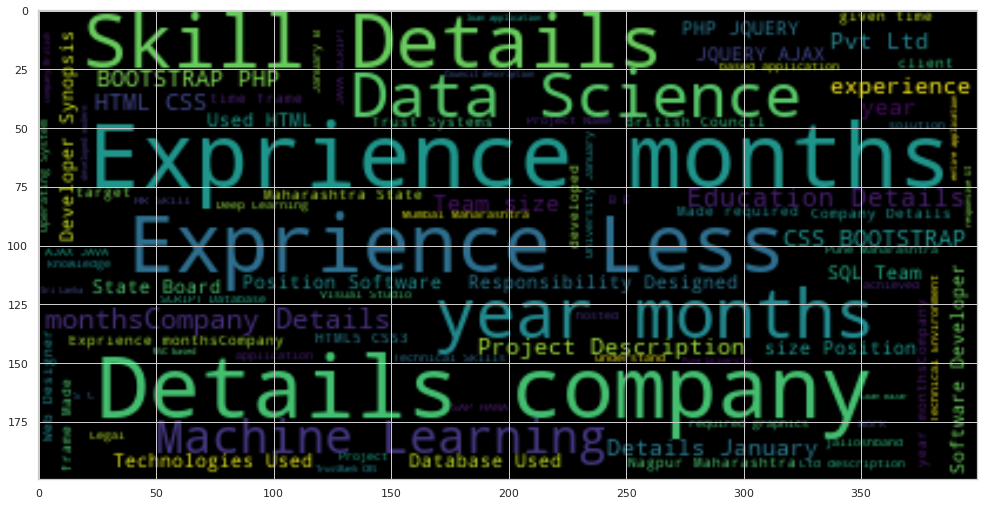

In [ ]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

# print(most_common)
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

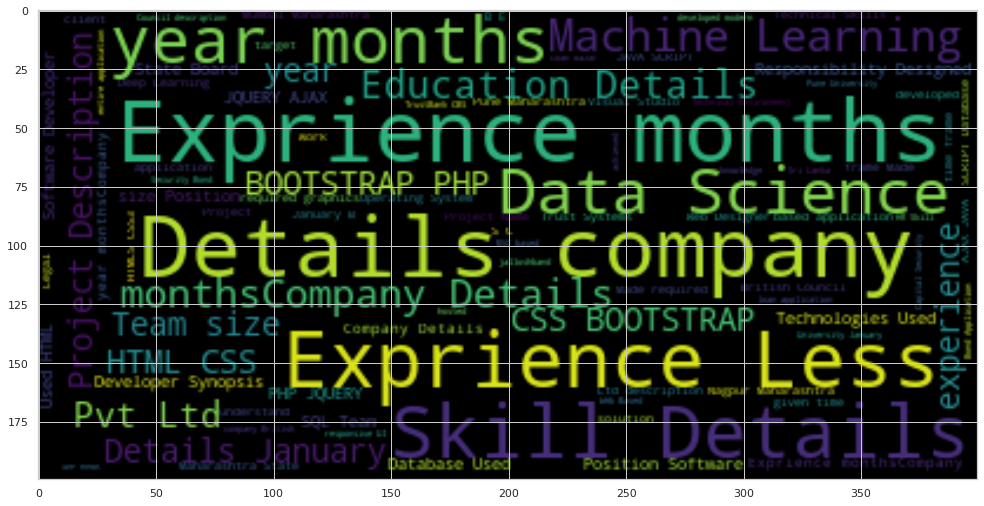

In [ ]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['clean text'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

# print(most_common)
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

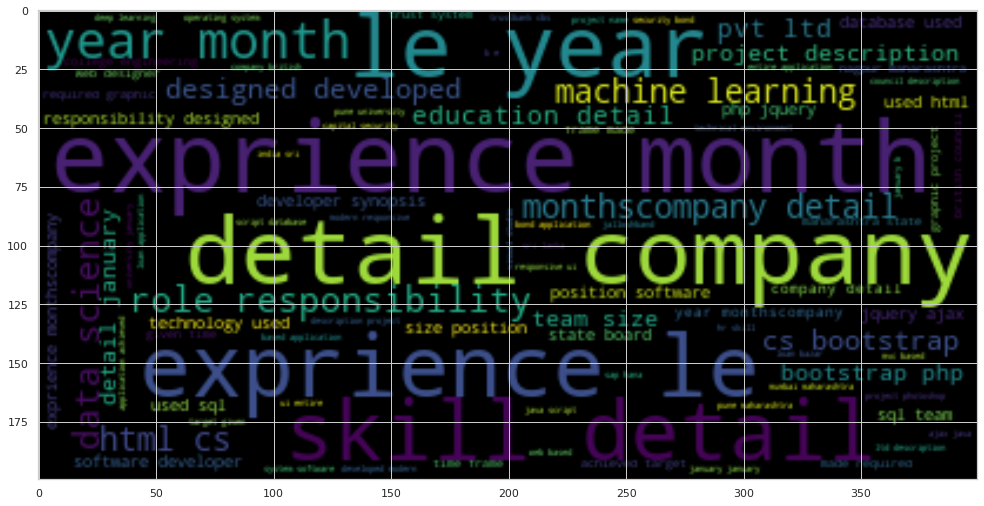

In [ ]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['clean_res'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

# print(most_common)
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

In [ ]:
# WC=WordCloud().generate(cleanSentences)
# plt.figure(figsize=(15,15))
# plt.imshow(WC, interpolation='bilinear')

In [ ]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

df.head(10)


,Category,Resume,length,clean text,clean_res
0,6,Skills * Programming Languages: Python (pandas...,12,Skills Programming Languages Python pandas num...,skill programming language python panda numpy ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,12,Education Details May 2013 to May 2017 B E UIT...,education detail may may b e uit rgpv data sci...
2,6,"Areas of Interest Deep Learning, Control Syste...",12,Areas of Interest Deep Learning Control System...,area interest deep learning control system des...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,12,Skills R Python SAP HANA Table...,skill r python sap hana tableau sap hana sql s...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",12,Education Details MCA YMCAUST Faridabad Haryan...,education detail mca ymcaust faridabad haryana...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",12,SKILLS C Basics IOT Python MATLAB Data Science...,skill c basic iot python matlab data science m...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,12,Skills Python Tableau Data Visuali...,skill python tableau data visualization r stud...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,12,Education Details B Tech Rayat and Bahra Insti...,education detail b tech rayat bahra institute ...
8,6,Personal Skills â¢ Ability to quickly grasp t...,12,Personal Skills Ability to quickly grasp t...,personal skill ability quickly grasp technical...
9,6,Expertise â Data and Quantitative Analysis â...,12,Expertise Data and Quantitative Analysis ...,expertise data quantitative analysis decision ...


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# text=df['clean text'].values
text=df['clean_res'].values
terget=df['Category'].values



vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=250)

vect.fit(text)

Word_feature=vect.transform(text)

print(Word_feature.shape)

(962, 250)


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

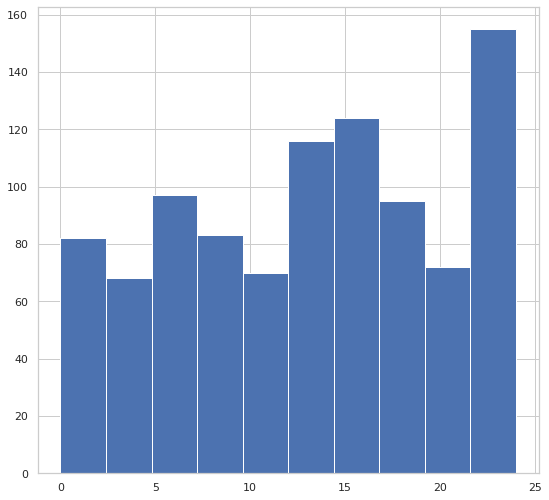

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(df['Category'])


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# tokenizer.fit_on_texts(df['clean text'].values)
tokenizer.fit_on_texts(df['clean_res'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6384 unique tokens.


In [ ]:
# X = tokenizer.texts_to_sequences(df['clean text'].values)
X = tokenizer.texts_to_sequences(df['clean_res'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of df tensor:', X.shape)

Shape of df tensor: (962, 250)


In [ ]:
Y = pd.get_dummies(df['Category']).values
print('Shape of Category tensor:', Y.shape)

Shape of Category tensor: (962, 25)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30,random_state=42)
print(Y_train)
print(X_test.shape,Y_test.shape)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(289, 250) (289, 25)


In [ ]:
# LSTM model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(128, dropout=0.5))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 250, 100)          5000000   
                                                                 
 dropout_35 (Dropout)        (None, 250, 100)          0         
                                                                 
 lstm_14 (LSTM)              (None, 128)               117248    
                                                                 
 dense_46 (Dense)            (None, 25)                3225      
                                                                 
Total params: 5,120,473
Trainable params: 5,120,473
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
batch_size = 30
my_callbacks = [
     tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)


Epoch 1/20
21/21 [==============================] - 5s 94ms/step - loss: 3.1946 - accuracy: 0.1405 - val_loss: 3.2443 - val_accuracy: 0.0294
Epoch 2/20
21/21 [==============================] - 1s 36ms/step - loss: 3.0700 - accuracy: 0.1653 - val_loss: 3.0671 - val_accuracy: 0.1029
Epoch 3/20
21/21 [==============================] - 1s 43ms/step - loss: 2.8332 - accuracy: 0.2545 - val_loss: 2.7096 - val_accuracy: 0.3529
Epoch 4/20
21/21 [==============================] - 1s 49ms/step - loss: 2.4221 - accuracy: 0.4711 - val_loss: 2.2704 - val_accuracy: 0.3676
Epoch 5/20
21/21 [==============================] - 1s 53ms/step - loss: 1.9903 - accuracy: 0.4926 - val_loss: 2.2077 - val_accuracy: 0.2941
Epoch 6/20
21/21 [==============================] - 2s 93ms/step - loss: 1.6636 - accuracy: 0.6264 - val_loss: 1.6736 - val_accuracy: 0.5000
Epoch 7/20
21/21 [==============================] - 1s 63ms/step - loss: 1.2319 - accuracy: 0.6793 - val_loss: 1.5733 - val_accuracy: 0.4706
Epoch 8/20
21

10/10 [==============================] - 0s 9ms/step


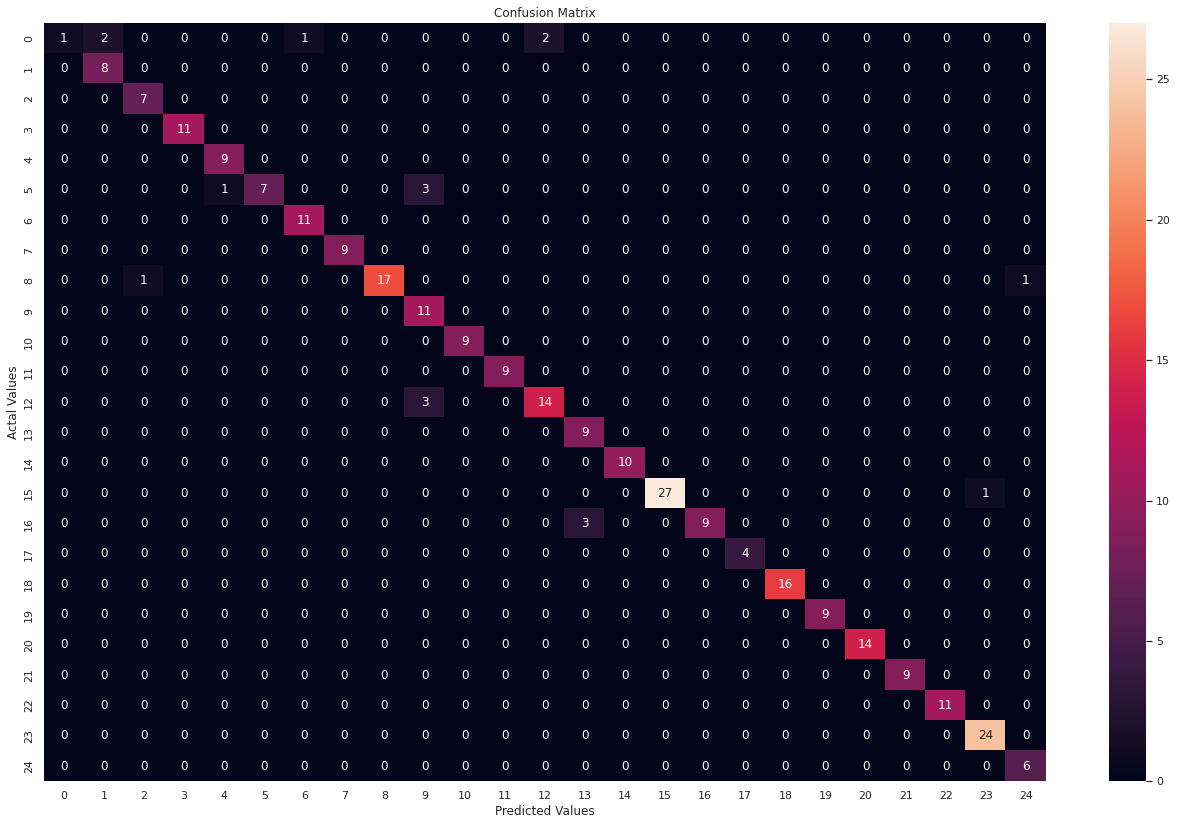

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,13))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

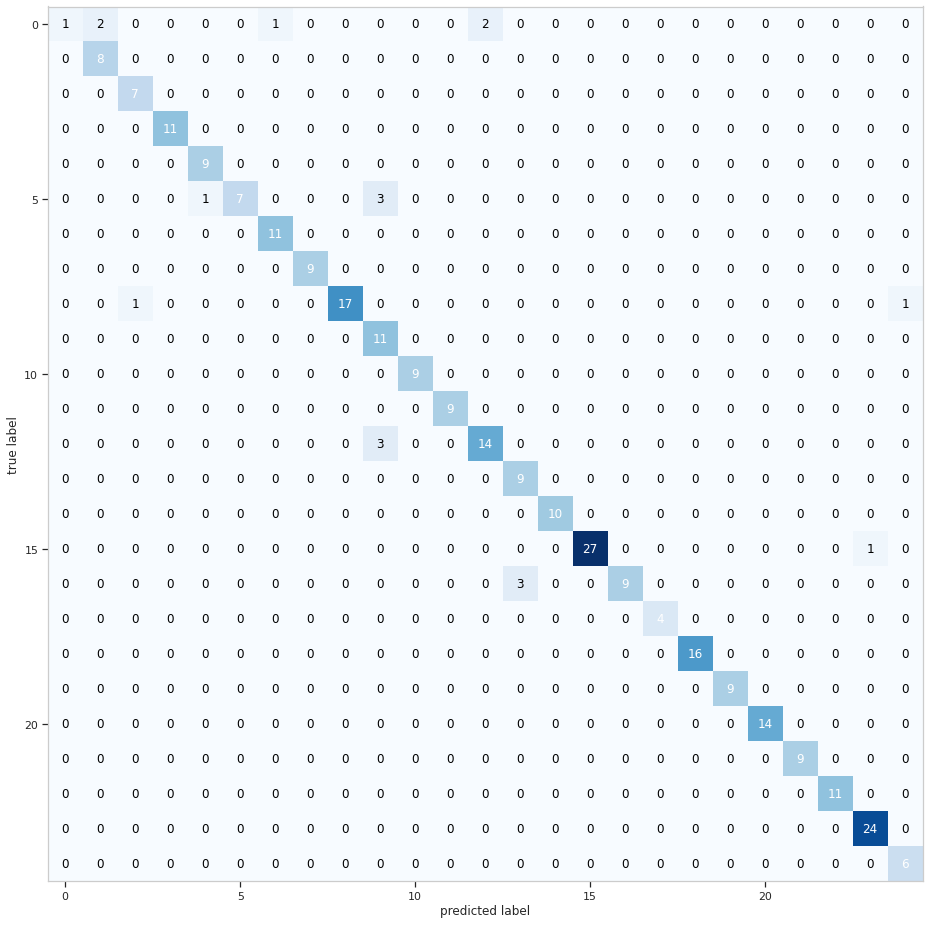

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,15),
                                cmap='Blues',
                                hide_ticks=False,
                                colorbar=False,
                                show_absolute=True,
                                show_normed=False)
plt.show()

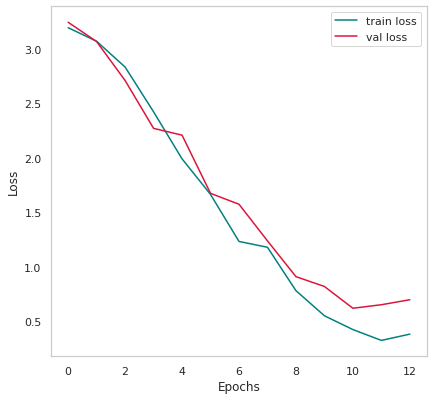

In [ ]:
# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

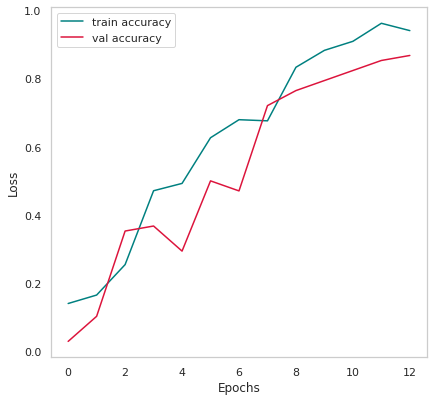

In [ ]:
#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test) 
val_preds = np.argmax(y_pred, axis=1)
val_preds

val_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, val_pred))

10/10 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.80      1.00      0.89         8
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95         9
           5       1.00      0.64      0.78        11
           6       0.92      1.00      0.96        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       0.65      1.00      0.79        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       0.88      0.82      0.85        17
          13       0.75      1.00      0.86         9
          14       1.00      1.00      1.00        10
          15       1.00      0.96      0.98        28
          16       1.00     

In [ ]:

# BiLSTM model


model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128, dropout=0.5)))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 250, 100)          5000000   
                                                                 
 dropout_36 (Dropout)        (None, 250, 100)          0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dense_47 (Dense)            (None, 25)                6425      
                                                                 
Total params: 5,240,921
Trainable params: 5,240,921
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 5s 85ms/step - loss: 3.1463 - accuracy: 0.1041 - val_loss: 3.1362 - val_accuracy: 0.1029
Epoch 2/20
21/21 [==============================] - 1s 38ms/step - loss: 2.9358 - accuracy: 0.1537 - val_loss: 2.9135 - val_accuracy: 0.1765
Epoch 3/20
21/21 [==============================] - 1s 39ms/step - loss: 2.6998 - accuracy: 0.2727 - val_loss: 2.7272 - val_accuracy: 0.2794
Epoch 4/20
21/21 [==============================] - 1s 39ms/step - loss: 2.4619 - accuracy: 0.3554 - val_loss: 2.5036 - val_accuracy: 0.4118
Epoch 5/20
21/21 [==============================] - 1s 38ms/step - loss: 2.0284 - accuracy: 0.5289 - val_loss: 1.9741 - val_accuracy: 0.5000
Epoch 6/20
21/21 [==============================] - 1s 39ms/step - loss: 1.5304 - accuracy: 0.6066 - val_loss: 1.6366 - val_accuracy: 0.5735
Epoch 7/20
21/21 [==============================] - 1s 39ms/step - loss: 1.2001 - accuracy: 0.7174 - val_loss: 1.3041 - val_accuracy: 0.6471
Epoch 8/20
21

10/10 [==============================] - 1s 16ms/step


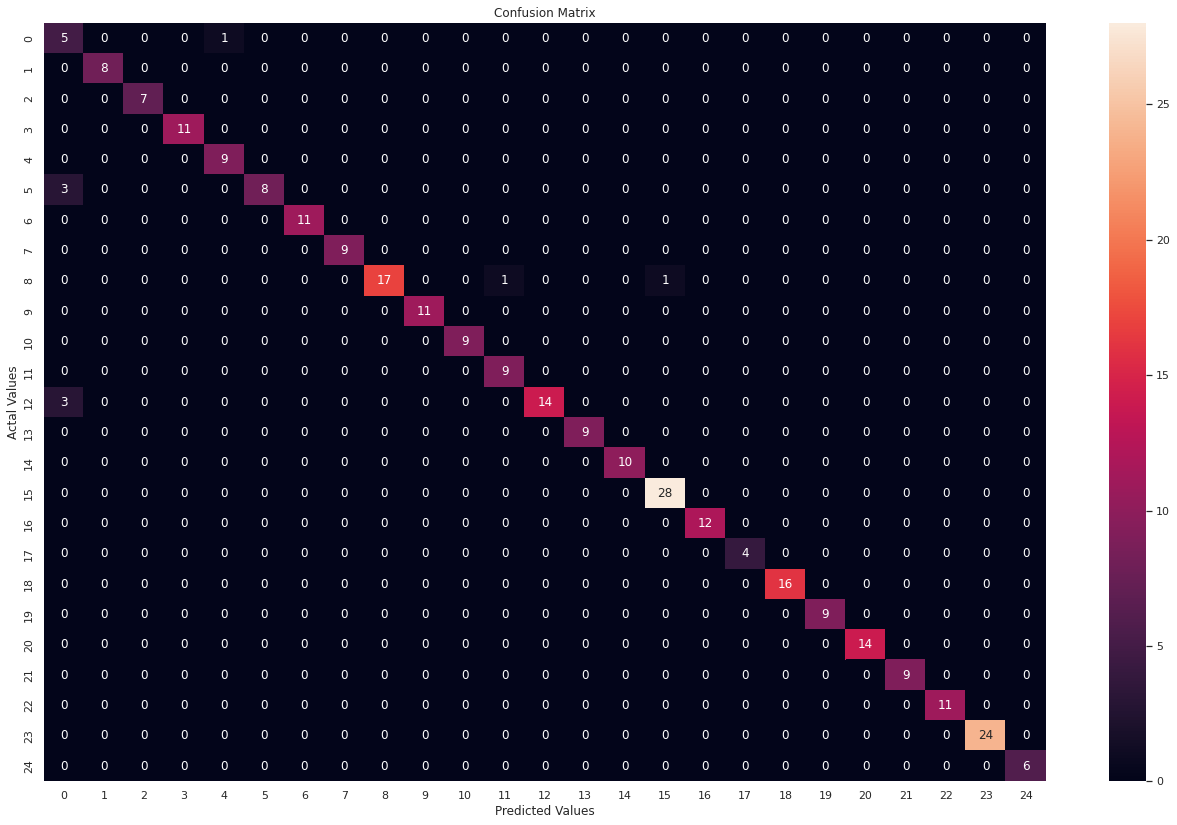

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,13))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

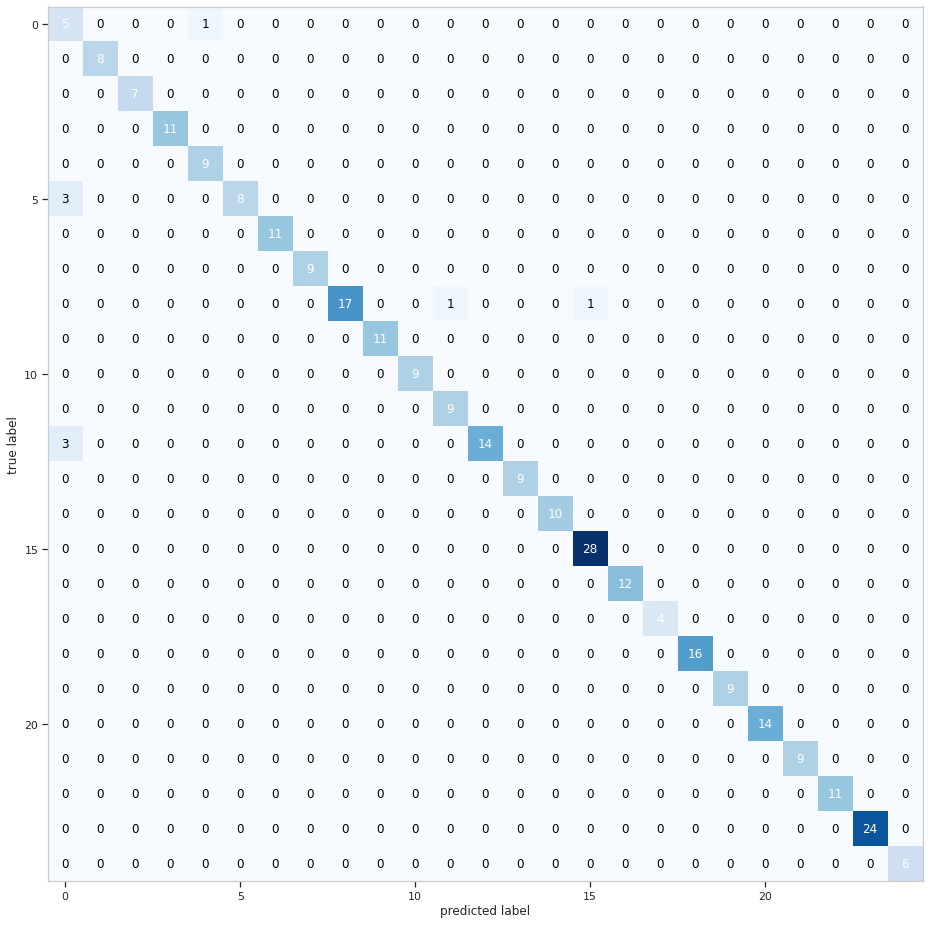

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,15),
                                cmap='Blues',
                                hide_ticks=False,
                                colorbar=False,
                                show_absolute=True,
                                show_normed=False)
plt.show()

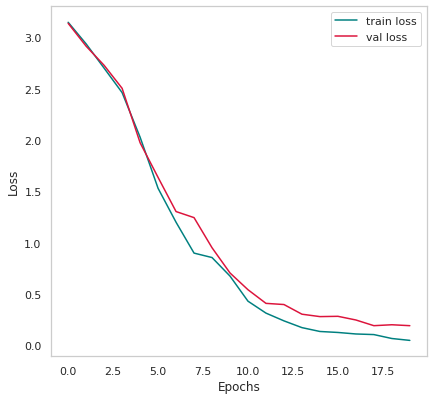

In [ ]:
# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

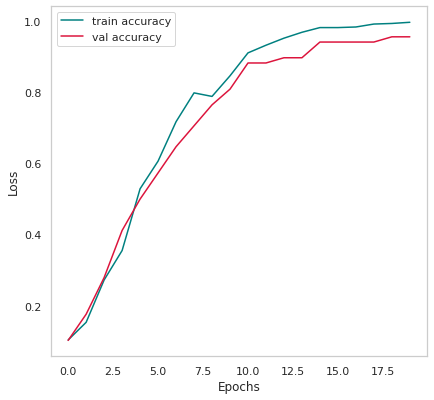

In [ ]:
#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test) 
val_preds = np.argmax(y_pred, axis=1)
val_preds

val_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, val_pred))

10/10 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95         9
           5       1.00      0.73      0.84        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       0.90      1.00      0.95         9
          12       1.00      0.82      0.90        17
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       0.97      1.00      0.98        28
          16       1.00    

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs

#training params
batch_size = 256 
num_epochs = 8 

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-4

In [ ]:
#CNN architecture
print("training CNN ...")
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(25, activation='softmax'))


opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

training CNN ...
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 250, 100)          5000000   
                                                                 
 conv1d_4 (Conv1D)           (None, 250, 64)           44864     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 125, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 125, 64)           28736     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_37 (Dropout)        (None, 

In [ ]:


epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 1s 28ms/step - loss: 3.1745 - accuracy: 0.1025 - val_loss: 3.1134 - val_accuracy: 0.1029
Epoch 2/20
21/21 [==============================] - 0s 18ms/step - loss: 3.0159 - accuracy: 0.1835 - val_loss: 2.9500 - val_accuracy: 0.1471
Epoch 3/20
21/21 [==============================] - 0s 17ms/step - loss: 2.7823 - accuracy: 0.3091 - val_loss: 2.6855 - val_accuracy: 0.2647
Epoch 4/20
21/21 [==============================] - 0s 19ms/step - loss: 2.4130 - accuracy: 0.4066 - val_loss: 2.2647 - val_accuracy: 0.6324
Epoch 5/20
21/21 [==============================] - 0s 17ms/step - loss: 1.9360 - accuracy: 0.5587 - val_loss: 1.7457 - val_accuracy: 0.7206
Epoch 6/20
21/21 [==============================] - 0s 18ms/step - loss: 1.4391 - accuracy: 0.7174 - val_loss: 1.2577 - val_accuracy: 0.7647
Epoch 7/20
21/21 [==============================] - 0s 19ms/step - loss: 1.0272 - accuracy: 0.7901 - val_loss: 0.8532 - val_accuracy: 0.8824
Epoch 8/20
21

10/10 [==============================] - 0s 3ms/step


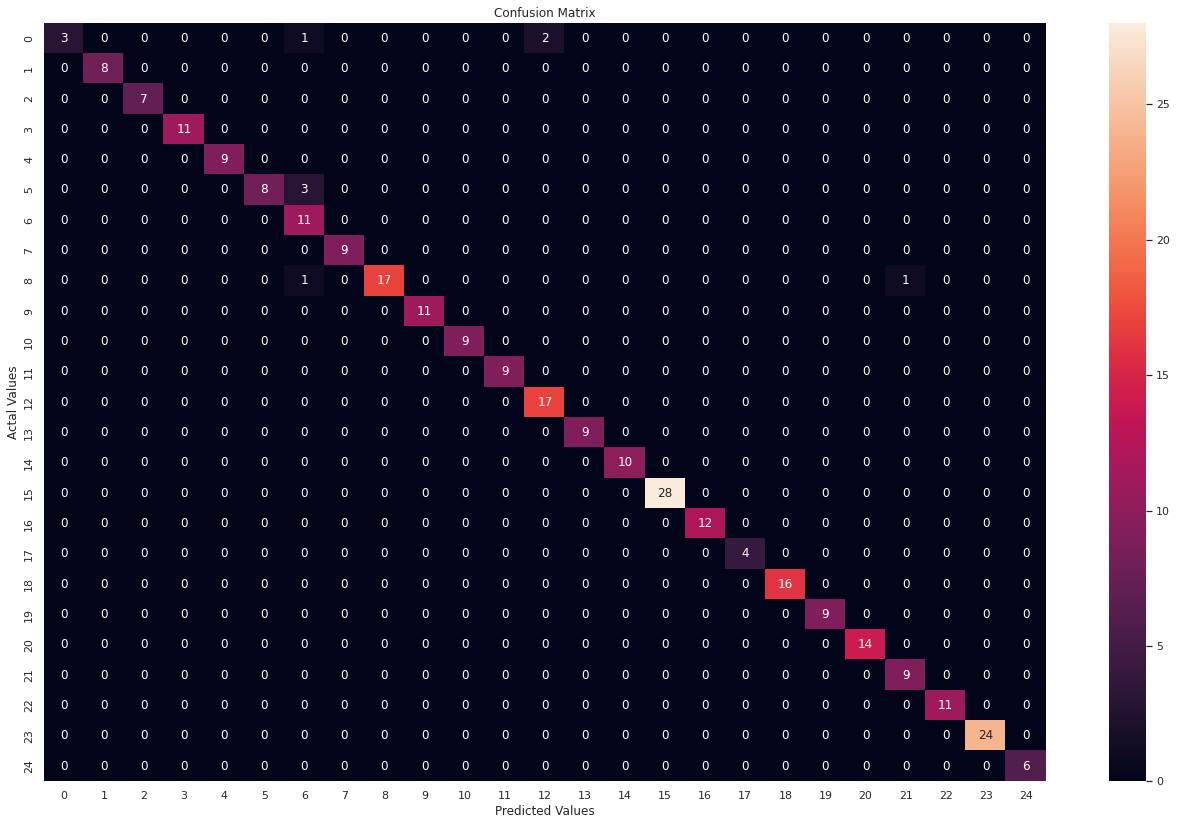

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,13))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

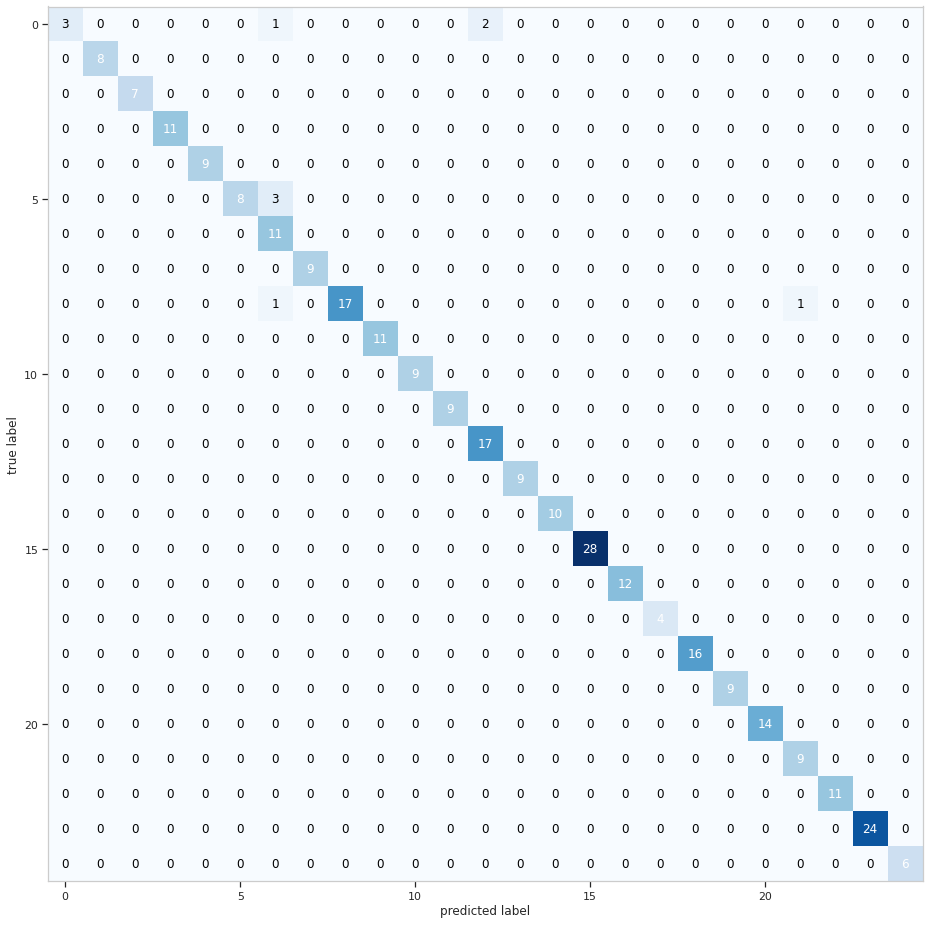

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,15),
                                cmap='Blues',
                                hide_ticks=False,
                                colorbar=False,
                                show_absolute=True,
                                show_normed=False)
plt.show()



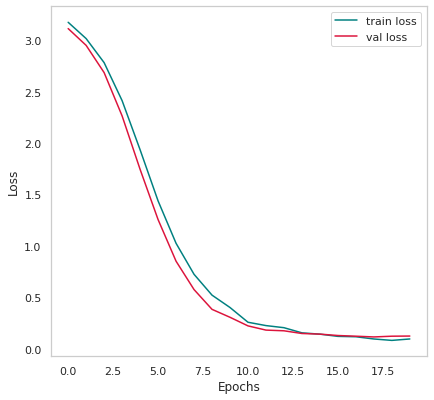

In [ ]:
# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

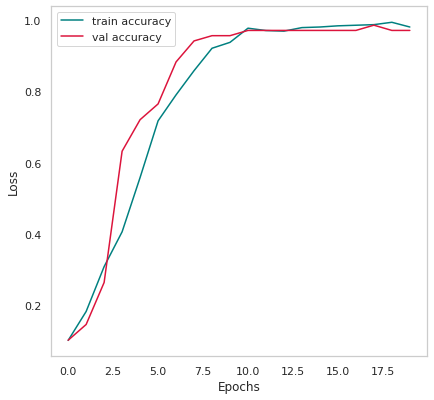

In [ ]:
#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:

from sklearn.metrics import classification_report
y_pred=model.predict(X_test) 
val_preds = np.argmax(y_pred, axis=1)
val_preds

val_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, val_pred))

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         9
           5       1.00      0.73      0.84        11
           6       0.69      1.00      0.81        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       0.89      1.00      0.94        17
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        28
          16       1.00     

In [ ]:
# GRU model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(GRU(128, dropout=0.5))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 250, 100)          5000000   
                                                                 
 dropout_38 (Dropout)        (None, 250, 100)          0         
                                                                 
 gru_4 (GRU)                 (None, 128)               88320     
                                                                 
 dense_50 (Dense)            (None, 25)                3225      
                                                                 
Total params: 5,091,545
Trainable params: 5,091,545
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 3s 49ms/step - loss: 3.2032 - accuracy: 0.0893 - val_loss: 3.1748 - val_accuracy: 0.1324
Epoch 2/20
21/21 [==============================] - 1s 29ms/step - loss: 3.1164 - accuracy: 0.1570 - val_loss: 3.1192 - val_accuracy: 0.1176
Epoch 3/20
21/21 [==============================] - 1s 26ms/step - loss: 2.9662 - accuracy: 0.1719 - val_loss: 2.9699 - val_accuracy: 0.2500
Epoch 4/20
21/21 [==============================] - 1s 25ms/step - loss: 2.8277 - accuracy: 0.5471 - val_loss: 2.8222 - val_accuracy: 0.5735
Epoch 5/20
21/21 [==============================] - 1s 26ms/step - loss: 2.5140 - accuracy: 0.6496 - val_loss: 2.4325 - val_accuracy: 0.5294
Epoch 6/20
21/21 [==============================] - 1s 26ms/step - loss: 1.9230 - accuracy: 0.5802 - val_loss: 1.8829 - val_accuracy: 0.6176
Epoch 7/20
21/21 [==============================] - 1s 27ms/step - loss: 1.3701 - accuracy: 0.7504 - val_loss: 1.4659 - val_accuracy: 0.6765
Epoch 8/20
21

10/10 [==============================] - 0s 9ms/step


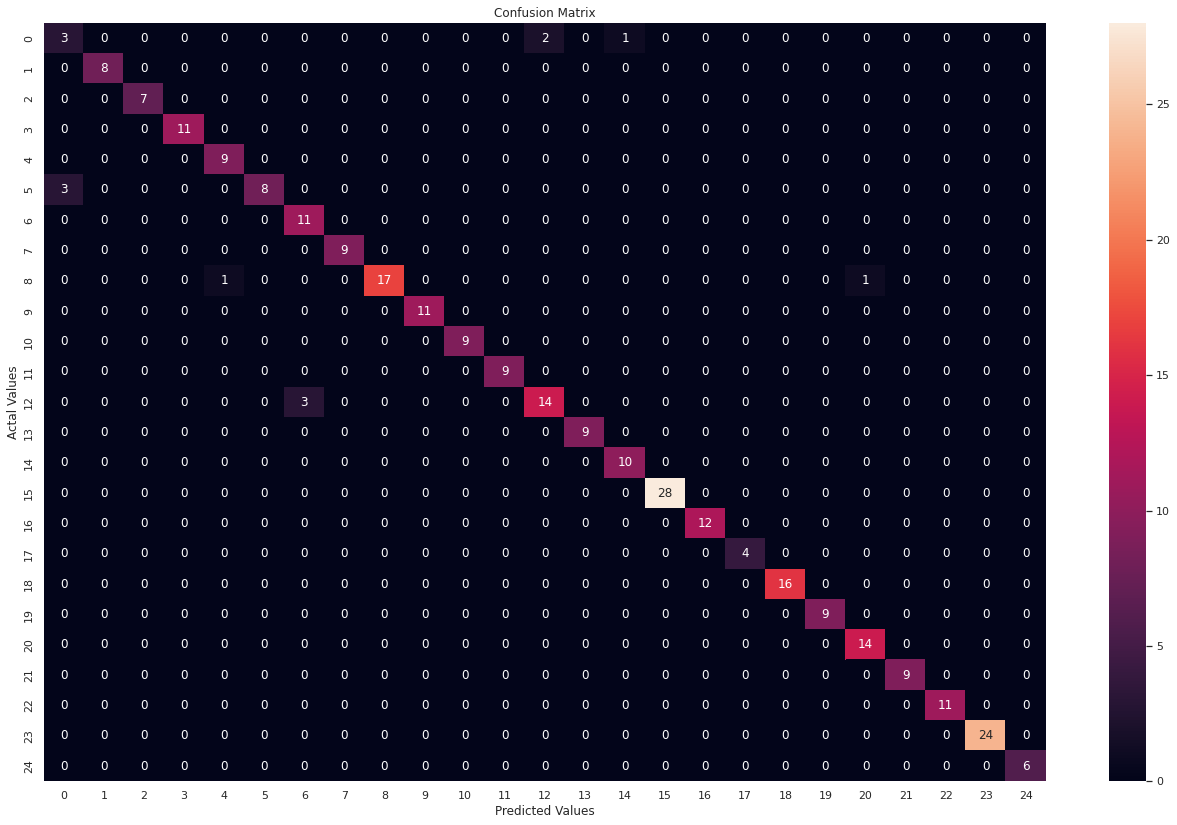

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,13))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

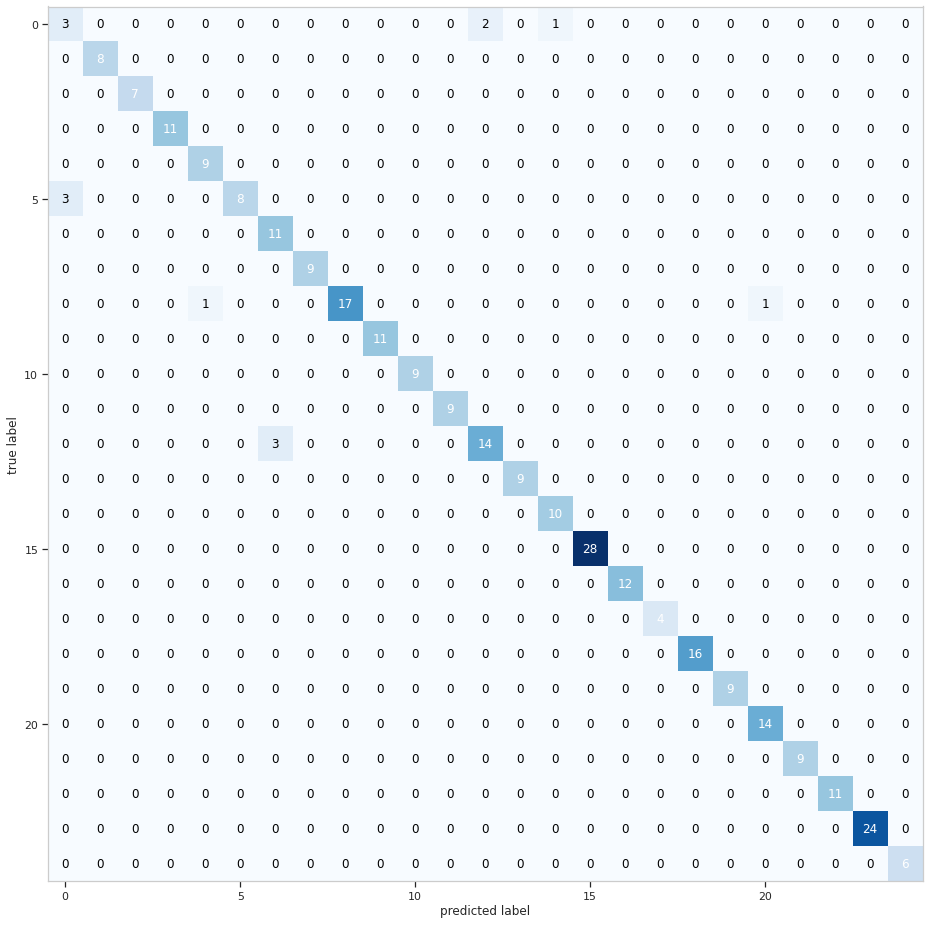

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,15),
                                cmap='Blues',
                                hide_ticks=False,
                                colorbar=False,
                                show_absolute=True,
                                show_normed=False)
plt.show()


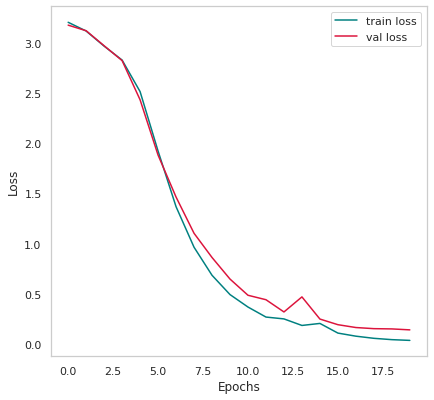

In [ ]:
# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

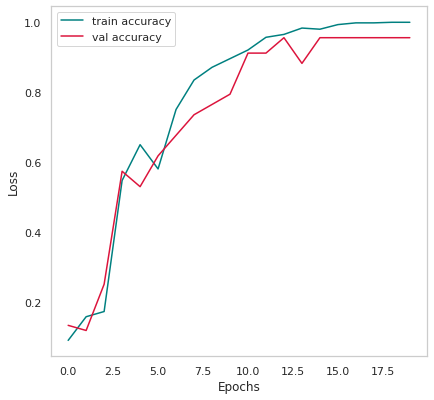

In [ ]:
#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test) 
val_preds = np.argmax(y_pred, axis=1)
val_preds

val_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, val_pred))

10/10 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95         9
           5       1.00      0.73      0.84        11
           6       0.79      1.00      0.88        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       0.88      0.82      0.85        17
          13       1.00      1.00      1.00         9
          14       0.91      1.00      0.95        10
          15       1.00      1.00      1.00        28
          16       1.00     

In [ ]:
# BiGRU model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, dropout=0.5)))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 5s 88ms/step - loss: 3.1806 - accuracy: 0.1025 - val_loss: 3.1656 - val_accuracy: 0.0588
Epoch 2/20
21/21 [==============================] - 1s 39ms/step - loss: 3.0348 - accuracy: 0.1570 - val_loss: 3.0864 - val_accuracy: 0.1471
Epoch 3/20
21/21 [==============================] - 1s 36ms/step - loss: 2.8251 - accuracy: 0.2264 - val_loss: 3.0949 - val_accuracy: 0.0882
Epoch 4/20
21/21 [==============================] - 2s 79ms/step - loss: 2.5252 - accuracy: 0.3041 - val_loss: 2.6198 - val_accuracy: 0.3529
Epoch 5/20
21/21 [==============================] - 1s 36ms/step - loss: 2.0604 - accuracy: 0.5140 - val_loss: 2.1836 - val_accuracy: 0.3824
Epoch 6/20
21/21 [==============================] - 1s 40ms/step - loss: 1.4711 - accuracy: 0.6711 - val_loss: 1.6145 - val_accuracy: 0.5882
Epoch 7/20
21/21 [==============================] - 1s 40ms/step - loss: 1.0577 - accuracy: 0.7686 - val_loss: 1.2278 - val_accuracy: 0.6912
Epoch 8/20
21

10/10 [==============================] - 1s 15ms/step


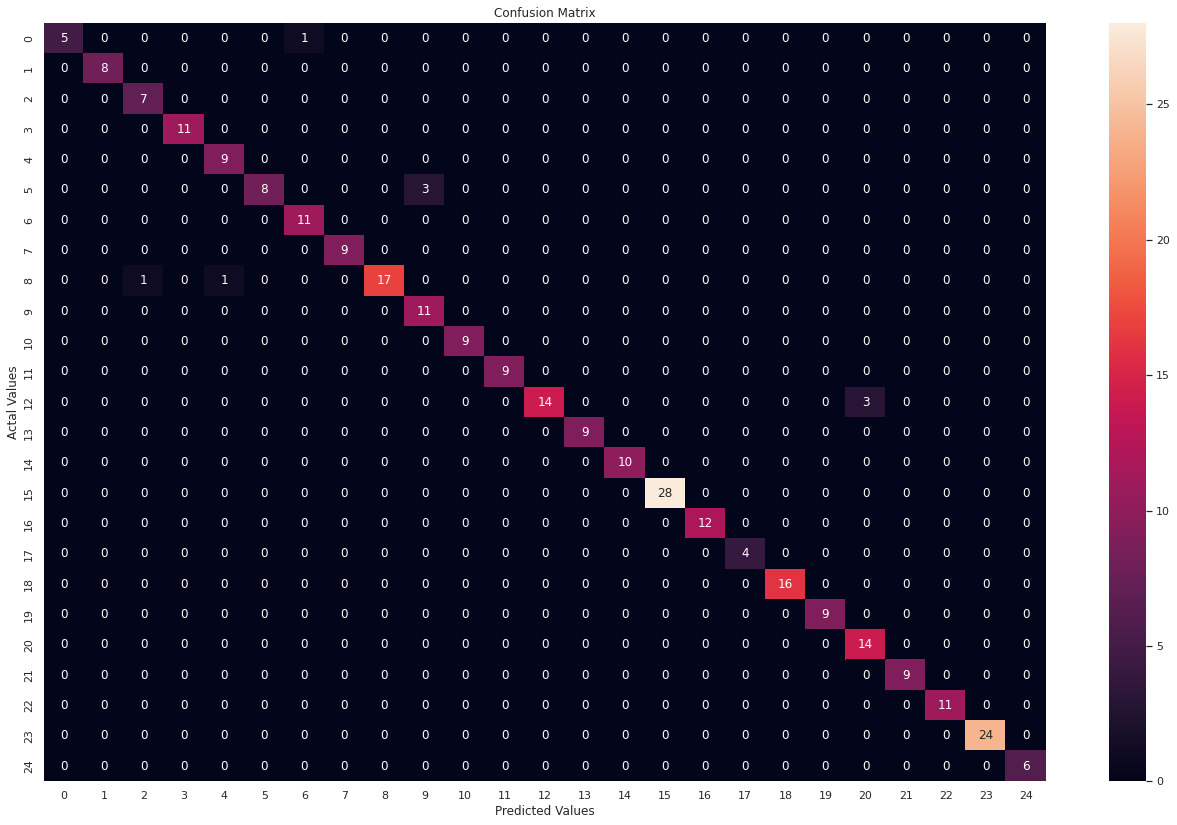

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,13))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

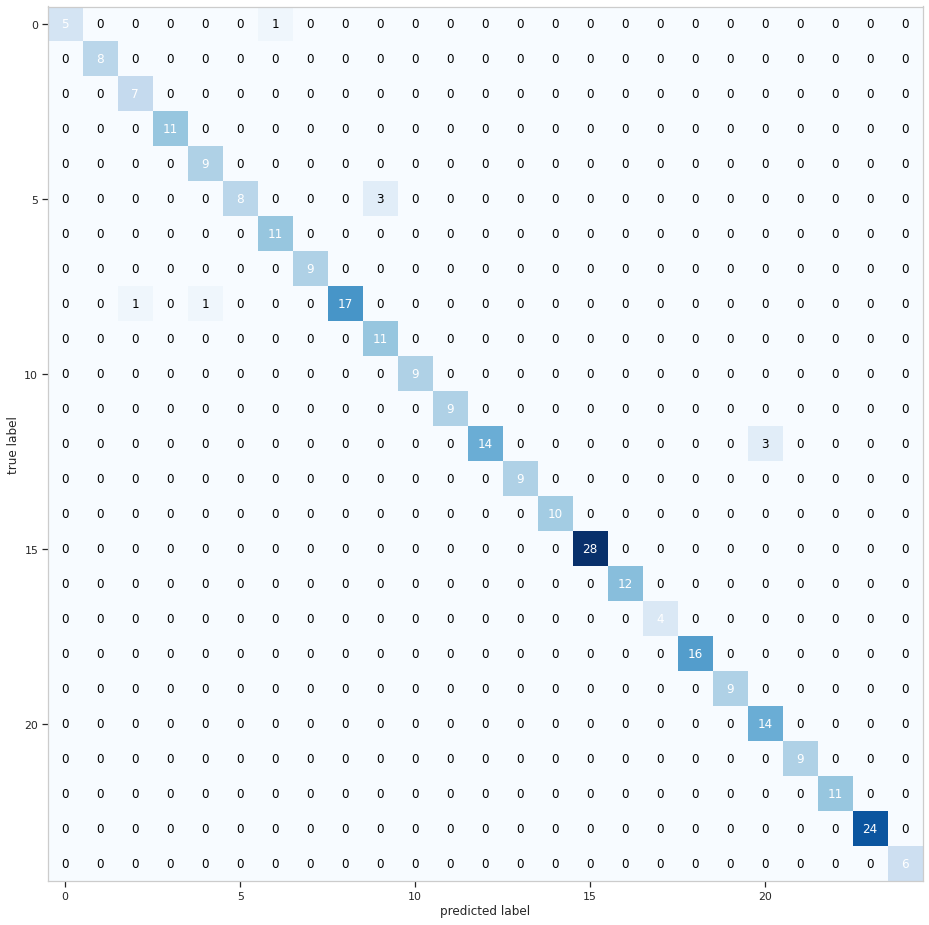

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,15),
                                cmap='Blues',
                                hide_ticks=False,
                                colorbar=False,
                                show_absolute=True,
                                show_normed=False)
plt.show()


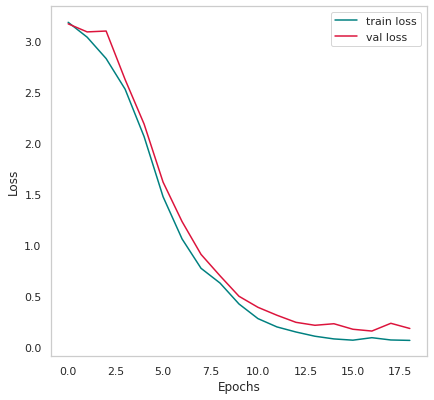

In [ ]:


# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


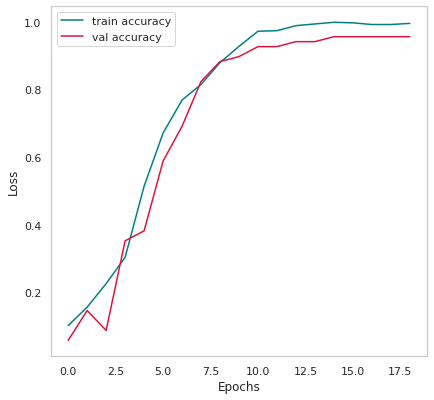

In [ ]:
#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test) 
val_preds = np.argmax(y_pred, axis=1)
val_preds

val_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, val_pred))

10/10 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         8
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95         9
           5       1.00      0.73      0.84        11
           6       0.92      1.00      0.96        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       0.79      1.00      0.88        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       1.00      0.82      0.90        17
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        28
          16       1.00    

In [ ]:
X_train

array([[   0,    0,    0, ...,   14,   77,  429],
       [   0,    0,    0, ..., 2532,  819, 1063],
       [   0,    0,    0, ...,   11,   19,  218],
       ...,
       [ 128, 1161, 2187, ...,  189, 1387,  189],
       [   0,    0,    0, ...,   27,  144,  349],
       [   0,    0,    0, ..., 2713,  872,   37]], dtype=int32)

In [ ]:
Y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 13ms/step


In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)


10/10 [==============================] - 0s 12ms/step


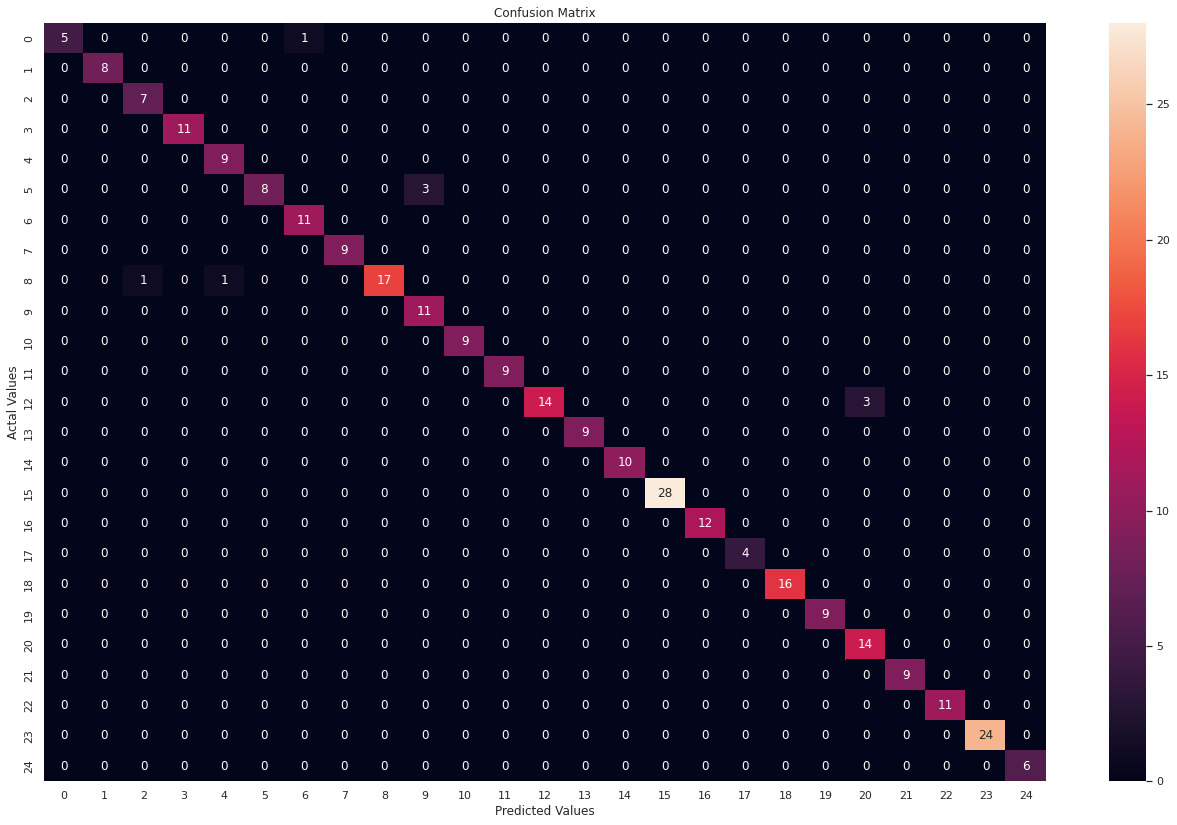

In [ ]:

plt.figure(figsize=(20,13))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

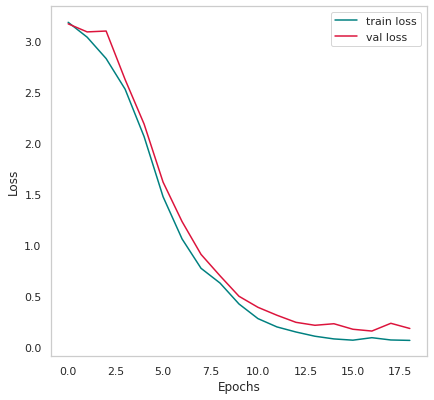

In [ ]:
# loss
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='train loss', color='teal')
plt.plot(history.history['val_loss'], label='val loss',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

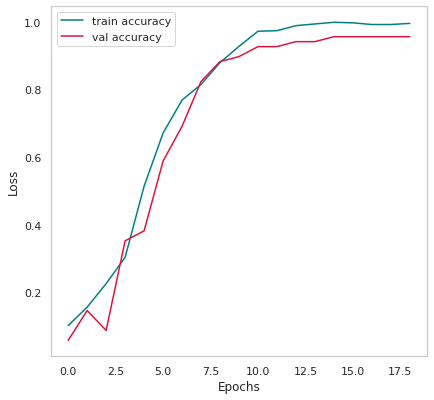

In [ ]:
#accuracy
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='train accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='val accuracy',color='crimson')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

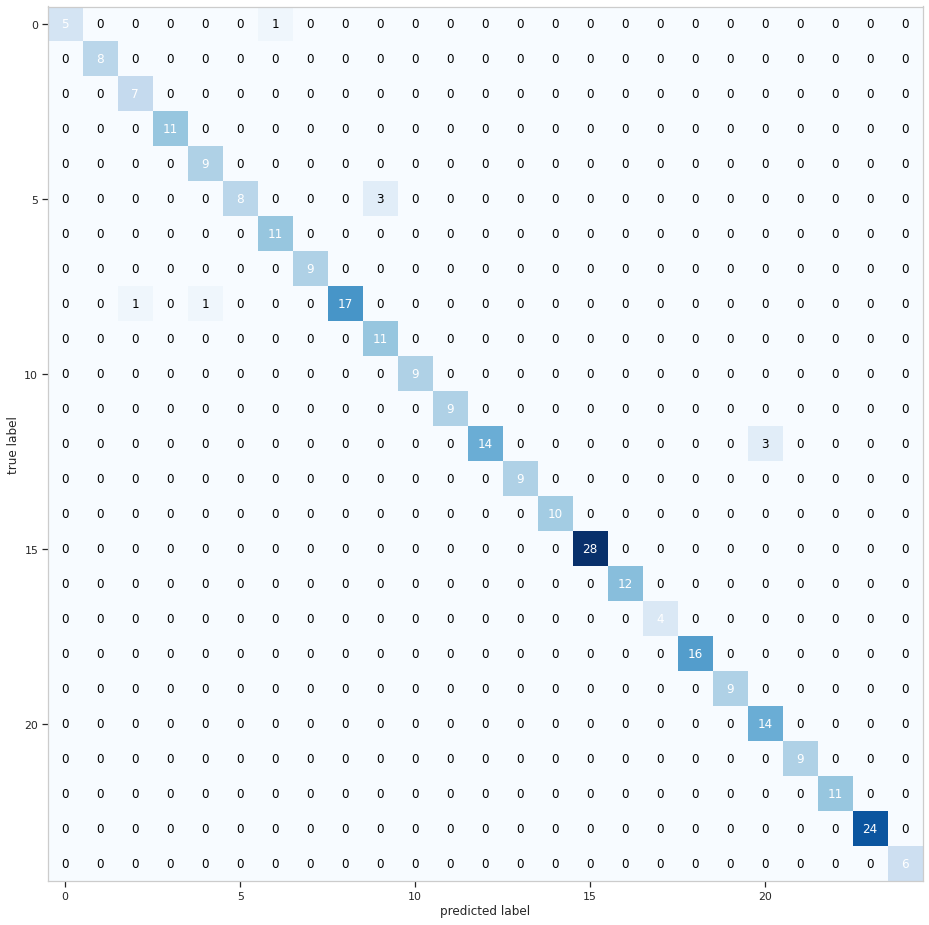

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,15),
                                cmap='Blues',
                                hide_ticks=False,
                                colorbar=False,
                                show_absolute=True,
                                show_normed=False)
plt.show()

In [ ]:
y_pred=model.predict(X_test) 
val_preds = np.argmax(y_pred, axis=1)
val_preds


10/10 [==============================] - 0s 15ms/step


array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        9, 11, 15, 20,  3,  9,  3,  7, 12, 19,  8, 20,  2,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  9, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 20,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23,  2,  3, 18, 14,  1, 12, 13, 22, 20, 11, 23,
       18, 15, 19, 15,  6,  0, 15,  8,  9, 16,  6, 12, 14,  9, 15,  4,  6,
       20, 16,  7,  8, 23

In [ ]:
from sklearn.metrics import classification_report
val_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, val_pred))

10/10 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         8
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95         9
           5       1.00      0.73      0.84        11
           6       0.92      1.00      0.96        11
           7       1.00      1.00      1.00         9
           8       1.00      0.89      0.94        19
           9       0.79      1.00      0.88        11
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       1.00      0.82      0.90        17
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        28
          16       1.00    